<a href="https://colab.research.google.com/github/WilliamTrijant0/capstone-trashub/blob/ML-02/Trashub1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
tf.__version__

'2.15.0'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
img_generator = tf.keras.preprocessing.image.ImageDataGenerator(
                            rotation_range=90,
                            brightness_range=(0.5,1),
                            shear_range=0.2,
                            zoom_range=0.2,
                            channel_shift_range=0.2,
                            horizontal_flip=True,
                            vertical_flip=True,
                            rescale=1./255,
                            validation_split=0.3)

In [4]:
import zipfile
local_zip = 'drive/MyDrive/Dataset/garbage_classification.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('content/input')
zip_ref.close()

In [5]:
training_batches = img_generator.flow_from_directory(
    directory='/content/content/input/garbage_classification',
    target_size=(224, 224),
    batch_size=16,
    shuffle=True,
    subset="training")

validatioin_batches = img_generator.flow_from_directory(
    directory='/content/content/input/garbage_classification',
    target_size=(224, 224),
    batch_size=16,
    shuffle=True,
    subset="validation")

Found 10865 images belonging to 12 classes.
Found 4650 images belonging to 12 classes.


In [6]:
mobile = tf.keras.applications.mobilenet.MobileNet()

17225924/17225924 [==============================] - 1s 0us/step


In [7]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import zipfile
import random
from PIL import Image

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [9]:
from keras.layers import Activation, Dense, Flatten
x = mobile.layers[-5].output
x = Flatten()(x)
output = Dense(12, activation='softmax')(x)

In [10]:
from tensorflow.keras.models import Model
model = Model(inputs=mobile.input, outputs=output)

In [11]:
for layer in model.layers[:-23]:
  layer.trainable = False

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

In [13]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

In [ ]:
history = model.fit(x=training_batches,
                    validation_data = validatioin_batches,
                    epochs=10,
)

Epoch 1/10
680/680 [==============================] - 1120s 2s/step - loss: 0.6228 - accuracy: 0.8043 - val_loss: 0.4382 - val_accuracy: 0.8632
Epoch 2/10
680/680 [==============================] - 1080s 2s/step - loss: 0.3158 - accuracy: 0.8987 - val_loss: 0.4241 - val_accuracy: 0.8533
Epoch 3/10
680/680 [==============================] - 1085s 2s/step - loss: 0.2606 - accuracy: 0.9151 - val_loss: 0.3348 - val_accuracy: 0.8905
Epoch 4/10
680/680 [==============================] - 1087s 2s/step - loss: 0.2123 - accuracy: 0.9315 - val_loss: 0.3232 - val_accuracy: 0.8940
Epoch 5/10
680/680 [==============================] - 1090s 2s/step - loss: 0.1884 - accuracy: 0.9391 - val_loss: 0.3674 - val_accuracy: 0.8789
Epoch 6/10
680/680 [==============================] - 1095s 2s/step - loss: 0.1679 - accuracy: 0.9463 - val_loss: 0.3294 - val_accuracy: 0.8955
Epoch 7/10
680/680 [==============================] - 1094s 2s/step - loss: 0.1521 - accuracy: 0.9503 - val_loss: 0.2998 - val_accuracy:

In [ ]:
filenames = validatioin_batches.filenames
nb_samples = len(filenames)

model.evaluate_generator(validatioin_batches, nb_samples)

In [16]:
test_x, test_y = validatioin_batches.__getitem__(1)
preds = model.predict(test_x)

1/1 [==============================] - 1s 1s/step


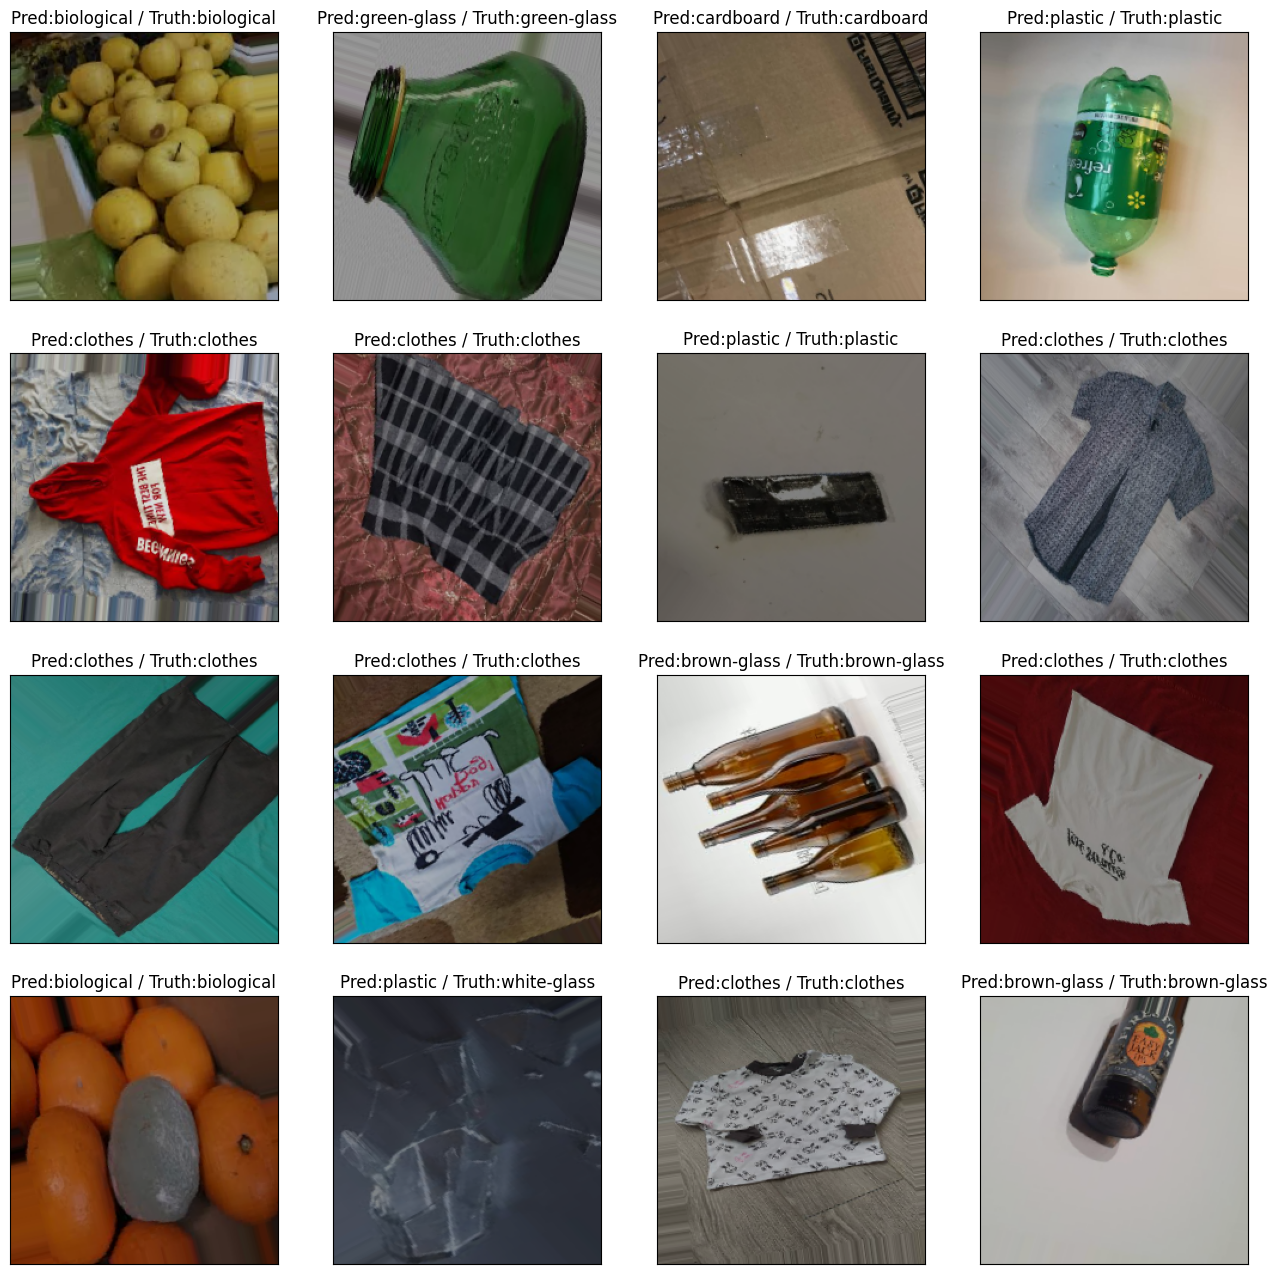

In [17]:
labels = (training_batches.class_indices)
labels = dict((v,k) for k,v in labels.items())
plt.figure(figsize=(16, 16))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Pred:%s / Truth:%s' % (labels[np.argmax(preds[i])], labels[np.argmax(test_y[i])]))
    plt.imshow(test_x[i])

In [18]:
model_save_path = "/content/drive/MyDrive/garbage_classification_model.h5"
saved_model_export_path = "/content/drive/MyDrive/saved_model"

model.save(model_save_path)
tf.saved_model.save(model, saved_model_export_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_export_path)
tflite_model = converter.convert()

tflite_model_save_path = "/content/drive/MyDrive/model.tflite"
with open(tflite_model_save_path, "wb") as f:
    f.write(tflite_model)

print(f"Model disimpan dalam format .h5 di: {model_save_path}")
print(f"Model diekspor ke format SavedModel di: {saved_model_export_path}")
print(f"Model TensorFlow Lite disimpan di: {tflite_model_save_path}")

Model disimpan dalam format .h5 di: /content/drive/MyDrive/garbage_classification_model.h5
Model diekspor ke format SavedModel di: /content/drive/MyDrive/saved_model
Model TensorFlow Lite disimpan di: /content/drive/MyDrive/model.tflite
